## How well do Data Analysts get paid compared to other data roles and based on their skills?

Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)

In [2]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])

### 1. What is the expected salary for data roles in the US?

In [5]:
job_titles = df_US['job_title_short'].value_counts().head(6).index.tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [23]:
df_filtered = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_filtered.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()
job_order

['Senior Data Scientist',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Data Analyst']

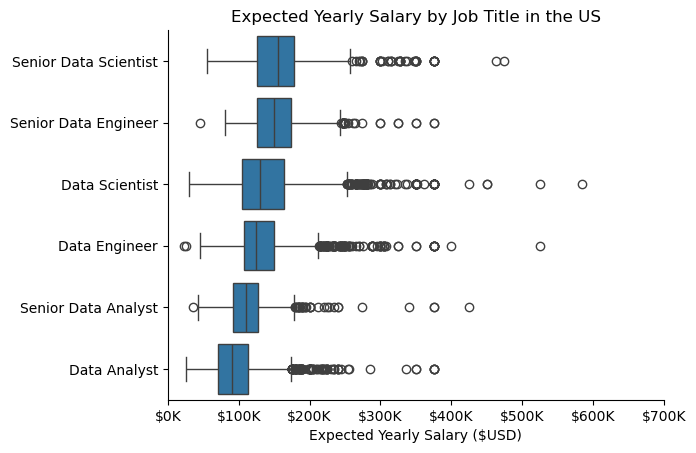

In [ ]:
sns.boxplot(data=df_filtered, x='salary_year_avg', y='job_title_short', order=job_order)
plt.ylabel('')
plt.xlabel('Expected Yearly Salary ($USD)')
ticks_x = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.xlim(0, 700000)
plt.title('Expected Yearly Salary by Job Title in the US')
sns.despine()

plt.show()

### 2. What is the expected salary for Data Analyst's based on their skills?

In [3]:
df_US_DA = df_US[df_US['job_title_short'] == 'Data Analyst']
df_US_DA.sample(10, random_state=42)[['job_title_short', 'salary_year_avg', 'job_skills']]

,job_title_short,salary_year_avg,job_skills
183027,Data Analyst,92750.0,"[sql, python, r, powerpoint, excel, tableau]"
768355,Data Analyst,138615.0,"[sql, word, excel, visio, powerpoint]"
463578,Data Analyst,87500.0,"[python, sql, power bi, dax, excel]"
658904,Data Analyst,80000.0,[express]
690578,Data Analyst,145000.0,"[python, java, javascript, c++, r, qlik, table..."
156918,Data Analyst,115000.0,"[sas, sas, spring, excel, ms access, tableau, ..."
662134,Data Analyst,90000.0,"[sas, sas, sql, python, r, excel]"
736748,Data Analyst,62500.0,"[python, sql, tableau, power bi, excel]"
298477,Data Analyst,60000.0,[css]
312080,Data Analyst,77265.0,"[sas, sas, powerpoint, ms access, excel, word]"


In [4]:
df_exploded = df_US_DA.explode('job_skills').dropna(subset=['job_skills'])

In [5]:
df_median_count = df_exploded.groupby('job_skills').agg(
    median_salary =('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'count')
)

df_median_count.index.name

'job_skills'

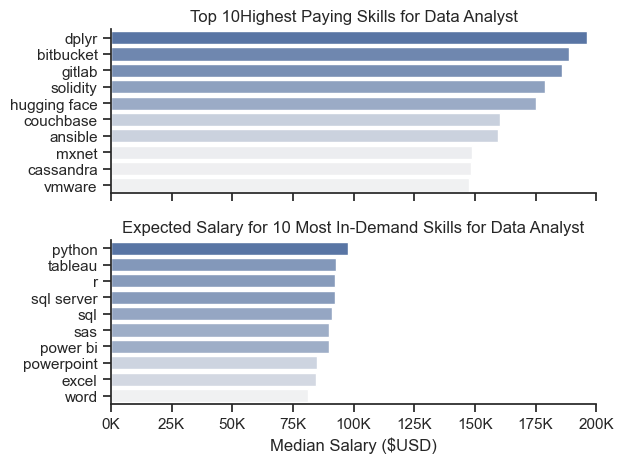

In [7]:
sns.set_theme(style="ticks")

fig, ax = plt.subplots(2,1)

for i, col in enumerate(df_median_count):
    if col == 'median_salary':
        df_plot = df_median_count.sort_values(by=col, ascending=False).head(10)
    else:
        df_plot = df_median_count.sort_values(by=col, ascending=False).head(10).sort_values(by='median_salary', ascending=False)
    sns.barplot(data=df_plot, x=df_plot['median_salary'], y=df_plot.index, ax=ax[i], hue='median_salary', palette='light:b')

    # Plot Design
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Median Salary ($USD)' if col == 'skill_count' else '')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 200000)
    if col == 'median_salary':
        ax[i].tick_params(axis='x', labelbottom=False)
        ax[i].set_title('Top 10Highest Paying Skills for Data Analyst')
    if col == 'skill_count':
        ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
        ax[i].set_title('Expected Salary for 10 Most In-Demand Skills for Data Analyst')
        sns.despine()
plt.tight_layout()
plt.show()